## Введение в Машинное Обучение. 

## Практическое домашнее задание 2

### Общая информация



```
# Выбран кодовый формат
```

Дата выдачи: 08.06.2022

Дедлайн: 15.06.2022 23:59

### О задании

Задание состоит из 4 частей. В рамках данной работы вам нужно будет работать с текстовыми объявлениями с платформы Avito. 

[ссылочка на связанный контест с дз](https://www.kaggle.com/competitions/hse-intro-ds-2022-hw2/overview)

Теперь вам придется более плотнее поработать с текстом. А именно: построить некоторые статистики на имеющихся текстовых данных. Заняться лемматизацией/стэммингом, поработать с фильтрацией текстовых данных.

Данные для домашнего задания расположены там же в контесте. Он также имеет четкий дедлайн, до которого вы можете заслать туда посылки (дедлайн в нем стоит чуть позже дедлайна дз, на всякий случай).

Для доступа к данным и лидерборду в контесте необходимо принять его правила. С ними все просто.

### Формат сдачи

Оформленный юпитер ноутбук отправляете на почту: `Anshtein99@mail.ru`

В теме письма указать (x - номер группы): 2022_fikl_ml_dz2_Surname_Name

Файл должен именоваться так: dz2_Surname_Name.ipynb (и да, здесь нужны именно ваши фамилия и имя)

### Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

**Дисклеймер!!!!** не удаляйте, пожалуйста, поле id из ваших данных, ни из тестовых, ни из учебных. Иначе вашы шансы сдать свои сабмишшины в систему будут стремиться к 0

UPD. В рамках этого задания данные имеют достаточно внушительный объем, поэтому рекомендуем вам выполнять данную работу в юпитер коллабе.

Также важно!!!: промежуточные вычисления вы можете сохранять на жесткий диск коллаба, т.к. в какой-то момент все необходимые матрицы могут не влезть к вам в оперативную память.
Также стоит сохранять веса некоторых посчитанных моделей (на всякий случай)
Как это делать описано [тут](https://scikit-learn.org/stable/model_persistence.html)

### 0. Закачка данных

В рамках этой дз настоятельно рекомендуем загрузить `train.csv` и `test.csv` предварительно на ваш гугл диск. Это достаточно сильно облегчит вам жизнь при подзагрузке данных сюда в коллаб. Сами датасеты вы сможете подтянуть через код ниже:

In [1]:
from google.colab import drive
drive.mount('/content/drive') #путь_до_файла_с_обучением_внутри_вашего_гуглодиска

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

Train = pd.read_csv('/content/drive/MyDrive/ds_intro_hw2/train.csv')

Как вы можете заметить, наш датасет для обучения весит достаточно много, а в ресурсах на коллабе мы ограничены, поэтому в рамках учебного ресерча мы перейдем к исследованию конкретной части семпла нашего трейна:

In [3]:
## ну и зафиксируем рандом на всякий случай)
Train = Train.sample(1000000, random_state=1337)
## так жизнь пойдет легче

### 1. Копаемся в полученных данных

Посмотрим на несколько на несколько строк нашего датасета. Первое, что стоит поисследовать, это наши метки, которые удобным образом представлены в текстовом формате. Поэтому...

**Заадние 1.** (1 балл). Постройте график распределения имеющихся классов. Хотелось бы увидть какую-нибудь гистограмму, где визуально видно топ-5 самых популярных и топ-5 самых непопулярных классов. Что это за категории?
Выведите из нашего трейна по паре объявлений из этих категорий. Можно ли заметить между ними (объявлениями 1 класса) какое-то сходство уже на данном этапе?

In [ ]:
Train.head(10)

,title,description,Category_name,Category
1482843,Айпад 4 WiFi 16 gb,"В хорошем состоянии, все работает, комплект то...",Планшеты и электронные книги,96
1703596,Платье,Платье в отличном состоянии./\nПокупала на нов...,"Одежда, обувь, аксессуары",27
1111682,Блок управления двигателем Мазда 6 GH 2010-201...,Блок управления двигателем Мазда 6 GH 2010-201...,Запчасти и аксессуары,10
2094016,"Nissan Leaf, 2013","Aze0. SOH 72%. Автомобиль аукционный, два комп...",Автомобили,9
3022433,Листовая Медь,"Листовая медь 20см*30см толщина 0,2мм за 200р/...",Ремонт и строительство,19
2286529,"1-к квартира, 43 м², 8/16 эт.",Продается просторная очень теплая однокомнатна...,Квартиры,24
1372358,Дендробиум Нобиле,"Продам дендробиумы Нобиле. Цвета на фото, есть...",Растения,106
2807521,Юбка для девочки,Юбочка очень пышная) на 116-122) в хорошем сос...,Детская одежда и обувь,29
1482888,Отдам 5 пакетов одежды,"каждое фото за 100 руб/\nчто-то побольше, что-...",Детская одежда и обувь,29
2255097,Шины Мишлен,цена за одну штуку,Ремонт и строительство,19


In [ ]:
from pandas.core.algorithms import value_counts

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 5 самых редких категорий

Train['Category_name'].value_counts(ascending=True)[:5]

Недвижимость за рубежом      34
Билеты и путешествия        706
Птицы                       870
Готовый бизнес             1014
Водный транспорт           1135
Name: Category_name, dtype: int64

In [ ]:
# дальше смотрим примеры (названия и описания)

In [ ]:
df_filter = Train['Category_name'].isin(['Недвижимость за рубежом']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Квартира (Болгария)', 'Квартира (Абхазия)']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['На бронирование более 14 дней предоставляю скидку. /\nВнимательно читайте объявление! /\nЗабронировано с 21.04 по 17.05; с 22.06 по 21.07; с 21.07 по 20.08. /\nСдаётся замечательная квартира в Приморско, Болгария. В квартире одна спальня и гостиная, объединённая с кухней. На кухне есть всё, вплоть до блендера и миксера, чтобы сделать ваш отдых удобным и комфортным.  В спальне стоит Детская кроватка. В квартире есть два кондиционера, и огромный балкон по периметру. Интернет, телевидение,  электричество и воду оплачивать не надо. /\nНа балконе уютно расположились стол и стулья для восхитительного завтрака с видом на горы и леса, а так же очень удобный мягкий шезлонг, если вам не хочется идти на море) /\nЧай, соль, сахар, подсолнечное масло - уже есть на кухне. /\nПриморско - это небольшой городок, в котором живут жители круглый год.  Он также известен своими замечательными чистыми пляжами, большой выбор которых создаст впечатление, что вы каждый раз отдыхаете в новом месте. В 70 км от 

In [ ]:
df_filter = Train['Category_name'].isin(['Билеты и путешествия']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Купоны М.Видео', 'Промокод ivi на 1 месяц. Гарантия']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['Купоны м видео на самсунг гэлэкси, 3шт - 300р',
 'Промокод ivi на 1 месяц. Я кидаю промокод, ты проверяешь работает ли он. Если работает-кидаешь мне деньги. Все просто)']

In [ ]:
df_filter = Train['Category_name'].isin(['Птицы']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Петухи и куры', 'Продам страусят']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['продам кур и петухов породы Брама,возраст 5 месяцев./\nкуры -500/\nпетух-1000',
 'Продам пару страусят Эмму , возраст  5 месяцев и Золотых фазанов ( в цвете),куры дек. Голандская хохлатая  белохвостая,голуби дутыши, цена 30000 т.р  за пару страусов.']

In [ ]:
df_filter = Train['Category_name'].isin(['Готовый бизнес']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Промышленная площадка Аркадакского нефтесклада',
 'Лпх с участком 30 сот с благоустроенным домом']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['ПАО «Саратовнефтепродукт» (дочернее общество ПАО «НК «Роснефть») \xa0реализует имущество, находящееся по адресу \xa0Саратовская область, Аркадакский район, город Аркадак, территория нефтебазы :/\n /\nПромышленная площадка Аркадакского нефтесклада, в т.ч.:/\n /\n1. Нежилое (административное) двухэтажное здание общей площадью 379,7 кв.м., литер А. Кадастровый номер: 64:02:020416:113./\n /\n2. Нежилое одноэтажное здание (контора) общей площадью 114,2 кв.м., литер А1. Кадастровый номер: 64:02:020416:112./\n /\n3. Насосная, назначение: нежилое здание, 1 этажное, общей площадью 45,6 кв.м., инв. № 63:203:002:000053840:Г4:20006, литер Г4. Кадастровый номер: 64:02:020416:119./\n /\n4. Разливочная, назначение: нежилое здание, 1 этажное, общей площадью 63 кв.м., инв. № 63:203:002:000053840:Г4:20009, литер Г7. Кадастровый номер: 64:02:020416:116.\xa0/\n /\n5. Часть нежилого одноэтажного здания общей площадью 34,2 кв.м., литер Г. Кадастровый номер: 64:02:020417:10./\n /\n6. Часть нежилого одноэта

In [ ]:
df_filter = Train['Category_name'].isin(['Водный транспорт']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Мотор HDX R Series T 8', 'Sea Ray Sundancer 275']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['Двухтактные лодочные моторы HDX - это компактные и надежные двигатели. /\nБренд\t—\tHDX/\nСистема зажигания\t—\tCDI/\nМакс. мощность, л.с.\t—\t8/\nМакс. мощность, кВт\t—\t5.9/\nКоличество тактов\t—\t2/\nВес мотора, кг\t—\t26/\nРабочий объем, куб.см\t—\t169/\nКоличество цилиндров\t—\t2/\nБолее подробно флинт.рус. Тел см foto',
 'Продается круизный морской катер Sea Ray Sundancer 275/\n Год выпуска: 2006 (куплен в 2010)/\n Мотор: Mercruiser Magnum 350 600м.ч.   /\n Колонка: Mercruiser Bravo 3/\n+ очень дорогая опция: встроенный морской генератор 220V Keller /\n+электролебедка якоря/\n+сигнализационная система StarLine с модулем тревоги на изменение положения (pointer)  GPS и GSM модули/\n+система пожаротушения/\nЗа техническое состояние катера можно не волноваться, так как все ТО проводились своевременно, к тому же за лодкой следил и ухаживал один и тот же мастер./\n/\nНа борту этого катера есть всё необходимое и даже больше. Две каюты (4 полноценных спальных места), кухня, санузел с т

In [ ]:
# 5 самых частых категорий

Train['Category_name'].value_counts(ascending=False)[:5]

Одежда, обувь, аксессуары     180697
Запчасти и аксессуары         174303
Детская одежда и обувь        136487
Товары для детей и игрушки     48747
Мебель и интерьер              37229
Name: Category_name, dtype: int64

In [ ]:
# дальше смотрим примеры (названия и описания)

In [ ]:
df_filter = Train['Category_name'].isin(['Одежда, обувь, аксессуары']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Платье', 'Сумка из натуральной кожи Италия']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['Платье в отличном состоянии./\nПокупала на новый год./\nКарсетное./\nКарсет украшен замшевыми вставками./\nДержится хорошо, на груди и спине силиконовые полоски./\nБез лямок, но есть крючки, можно приделать./\nПримерка а Авдотьино /\n/\nТип одежды: вечернее платье/\nДлина: миди/\nCезон: мульти/\nЦвет: чёрный/\nБренд: Befree',
 'Сумка из натуральной кожи с лазерной обработкой. Цвет чёрный, мало б/у, состояние новой. Привезена из Италии./\nСнаружи одна молния, внутри перегородка-карман на молнии по всей длине, плюс несколько карманов для мелочевки, все очень эргономично. Ремни на кольцах, по длине подходит как носить на плече, так и просто на локте. Отдельно ремня длинного через плечо не предусмотренно. Состояние сумки идеальное, дефектов, дыр нет. Подклад в идеальном состоянии.']

In [ ]:
df_filter = Train['Category_name'].isin(['Запчасти и аксессуары']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Блок управления двигателем Мазда 6 GH 2010-2013 Се', 'Капот Volvo S80']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['Блок управления двигателем Мазда 6 GH 2010-2013 Седан (Мазда 6 ГШ [рест, 2010-2013] Седан)/\n /\nАртикул: L84718881B/\n /\nНомер товара: 2817/\n /\nПримечание: Б/У, ОРИГИНАЛ, СМОТРИТЕ ФОТО, ПОДРОБНЕЕ ПО ТЕЛЕФОНУ./\n /\nЦена указана на товар, изображенный на фотографии./\n /\nЦены на другие аналогичные детали могут отличаться в зависимости от состояния деталей./\n /\nФорма оплаты: наличный или безналичный расчет./\n /\nОтгрузка товара: самовывозом или отправка через транспортную компанию/\n /\n************************************************************/\n /\nДОСТАВКА ПО МОСКВЕ В ДЕНЬ ЗАКАЗА/\n /\n************************************************************/\n /\nМы осуществляем доставку запчастей по всей России, через транспортные компании: ПЭК, КИТ, Деловые линии./\n /\n************************************************************/\n /\nЗВОНИТЕ, СПРАШИВАЙТЕ, ВСЕГДА РАДЫ ПОМОЧЬ!!!/\n /\n************************************************************/\n /\nВыкупаем битые, неисправные, гор

In [ ]:
df_filter = Train['Category_name'].isin(['Детская одежда и обувь']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Юбка для девочки', 'Отдам 5 пакетов одежды']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['Юбочка очень пышная) на 116-122) в хорошем состоянии) больше вещей в профиле)',
 'каждое фото за 100 руб/\nчто-то побольше, что-то поменьше/\nесть пакеты  на 2-4 года по100 руб/\nкольцо шубиных/\nрозовая ветровка 110-116 см 300 руб/\nбежев весна 110 см 100 руб/\nкуртка 110-116 см голубая на трикотажной подкладке в хорошем состоянии 300 руб/\nкуртка утепленная розовая 116 см 300 руб']

In [ ]:
df_filter = Train['Category_name'].isin(['Товары для детей и игрушки']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Коляска 2 в 1 Микадо', 'Коляска Tutis Tapy (3 в 1)']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['Продам польскую коляску Микадо в хорошем состоянии./\n/\nВ комплекте: люлька, прогулочный блок, дождевик, москитная сетка. Отсутствует сумка для мамы./\n/\nКоляска маневренная, с отличной амортизацией (пружинная). Передние колеса поворотные. Люлька вместительная. Ткань у коляски непродуваемая, непромокаемая. Пользовались в течение всех сезонов./\n/\nЧехлы постираны. Коляска чистая./\n/\nТорг. Абрау-Дюрсо.',
 'Детская коляску Tutis Tapu (Тутис Тапу) – она обладает всеми основными, необходимыми для здоровья и безопасности малыша свойствами./\n /\nКомплект коляски Tutis Tapu:/\n/\n🔹Складная спортивная рама/\n🔹Люлька/\n🔹Прогулочный блок/\n🔹Автокресло (0+)/\n🔹Аксессуары ( чехлы , сумка для мелких вещей, вместительная корзина для покупок ) /\n+достоинства : /\n🔹внешний вид/\n🔹высокая маневренность/\n🔹имеет поворотные колеса(2 тормоза на задних колёсах)/\n🔹легкая/\n- недостатки :/\nна шасси незначительно стёсана краска , при эксплуатации в машине , есть фото ☝🏻']

In [ ]:
df_filter = Train['Category_name'].isin(['Мебель и интерьер']) 
Train[df_filter].head(2)
Train[df_filter]['title'].tolist()[:2]

['Скдадной шкаф', 'Кровать']

In [ ]:
Train[df_filter]['description'].tolist()[:2]

['Продаю удобный складной шкаф с жёстким железным каркасом. Размеры: 80*55*180./\nШкаф б.у но в отличном состоянии./\nУдобен для тех, кто периодически переезжает.  В данный момент находится в сложенном состоянии и занимает очень мало места.',
 'Кровать, Спальное место: 1600х2000мм, Матрас в стоимость не входит, Доставка по СКФО 500 рублей, Оплата при получении, Гарантия 24 месяца! Матрас продается отдельно 4500 рублей!/\n/\nКровать Ронда 1,6/\n /\nФабрика Ронда г. Пенза']

In [ ]:
# чтобы не портить Train создаем его копию, которую сортируем по частоте категории

categ = Train
freqs = Train['Category_name'].value_counts()
categ['freq'] = categ['Category_name'].map(freqs)
categ = categ.sort_values(by='freq', ascending=False)
categ.head()

,title,description,Category_name,Category,freq
1274743,Комбинзон спецодежда,Новые 2 шт рост 170 и 186 цена за шт торг,"Одежда, обувь, аксессуары",27,180697
1813931,Чёрное платье с кружевом р-р 44-46,Идеальное маленькое чёрное платье отличного ка...,"Одежда, обувь, аксессуары",27,180697
176163,Пиджак женский,"Продаю пиджак женский, размер 48-50. Цвет темн...","Одежда, обувь, аксессуары",27,180697
3129828,Кроссовки мужские,Новые.По стельке 26 см.,"Одежда, обувь, аксессуары",27,180697
138192,Балетки,"Новые балетки, ни разу не одевались./\nНе под...","Одежда, обувь, аксессуары",27,180697


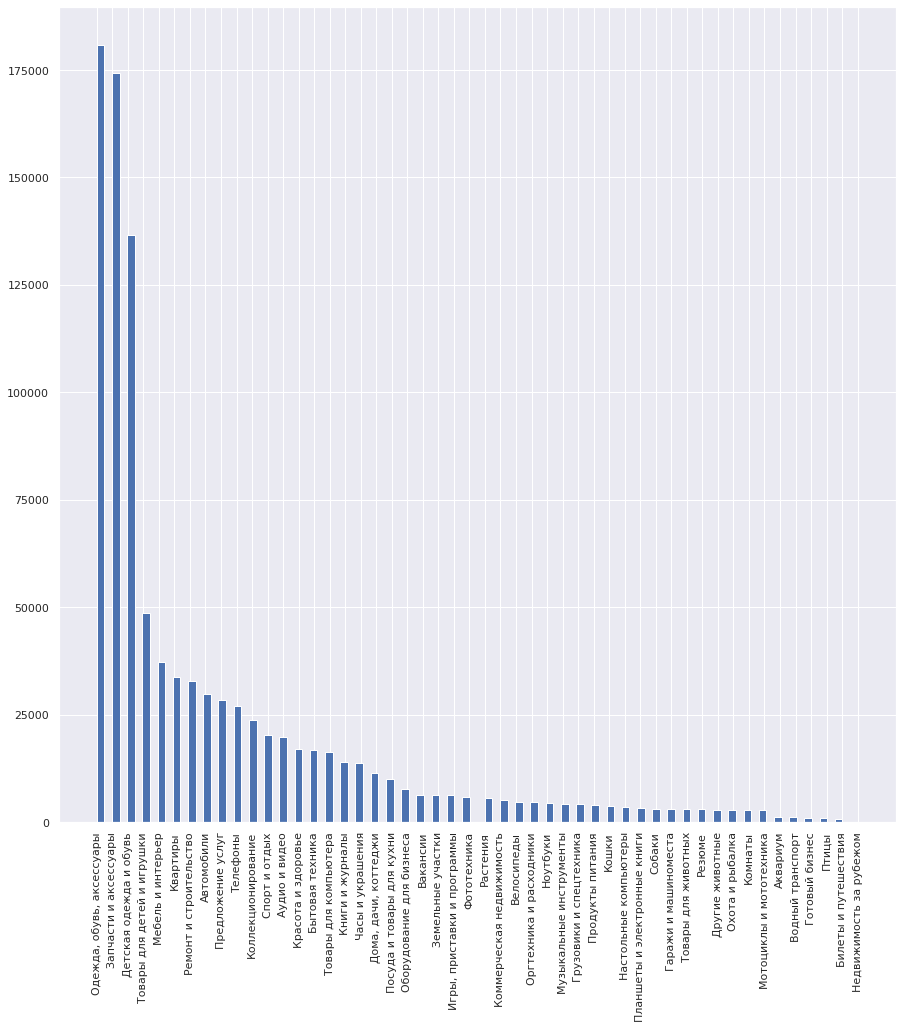

In [ ]:
# ниже две отсортированные гистограммы

plt.xticks(rotation=90)
categ['Category_name'].hist(bins = 100, figsize = (15,15))

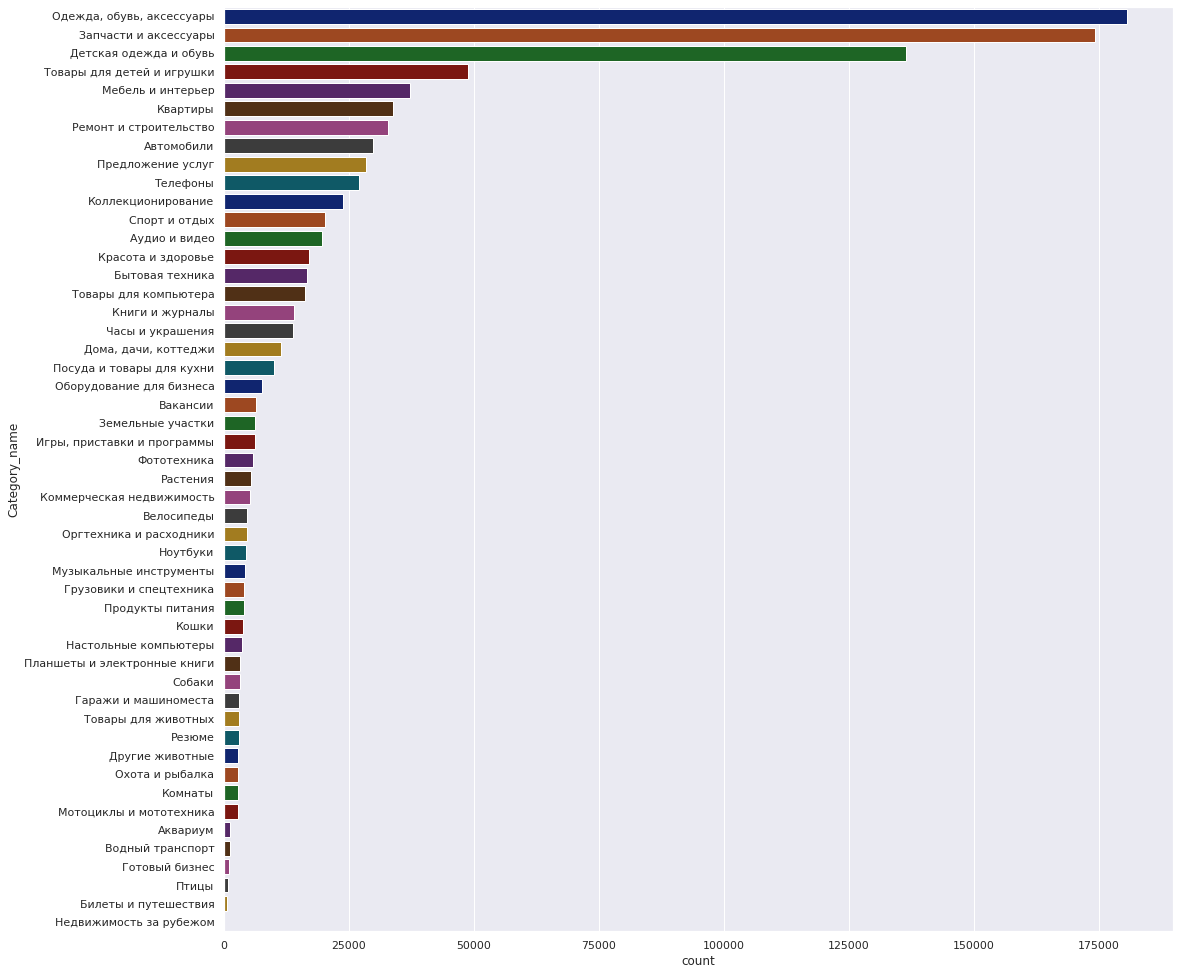

In [ ]:
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize']=17,17
sns.countplot(y='Category_name', data=categ, palette = "dark")

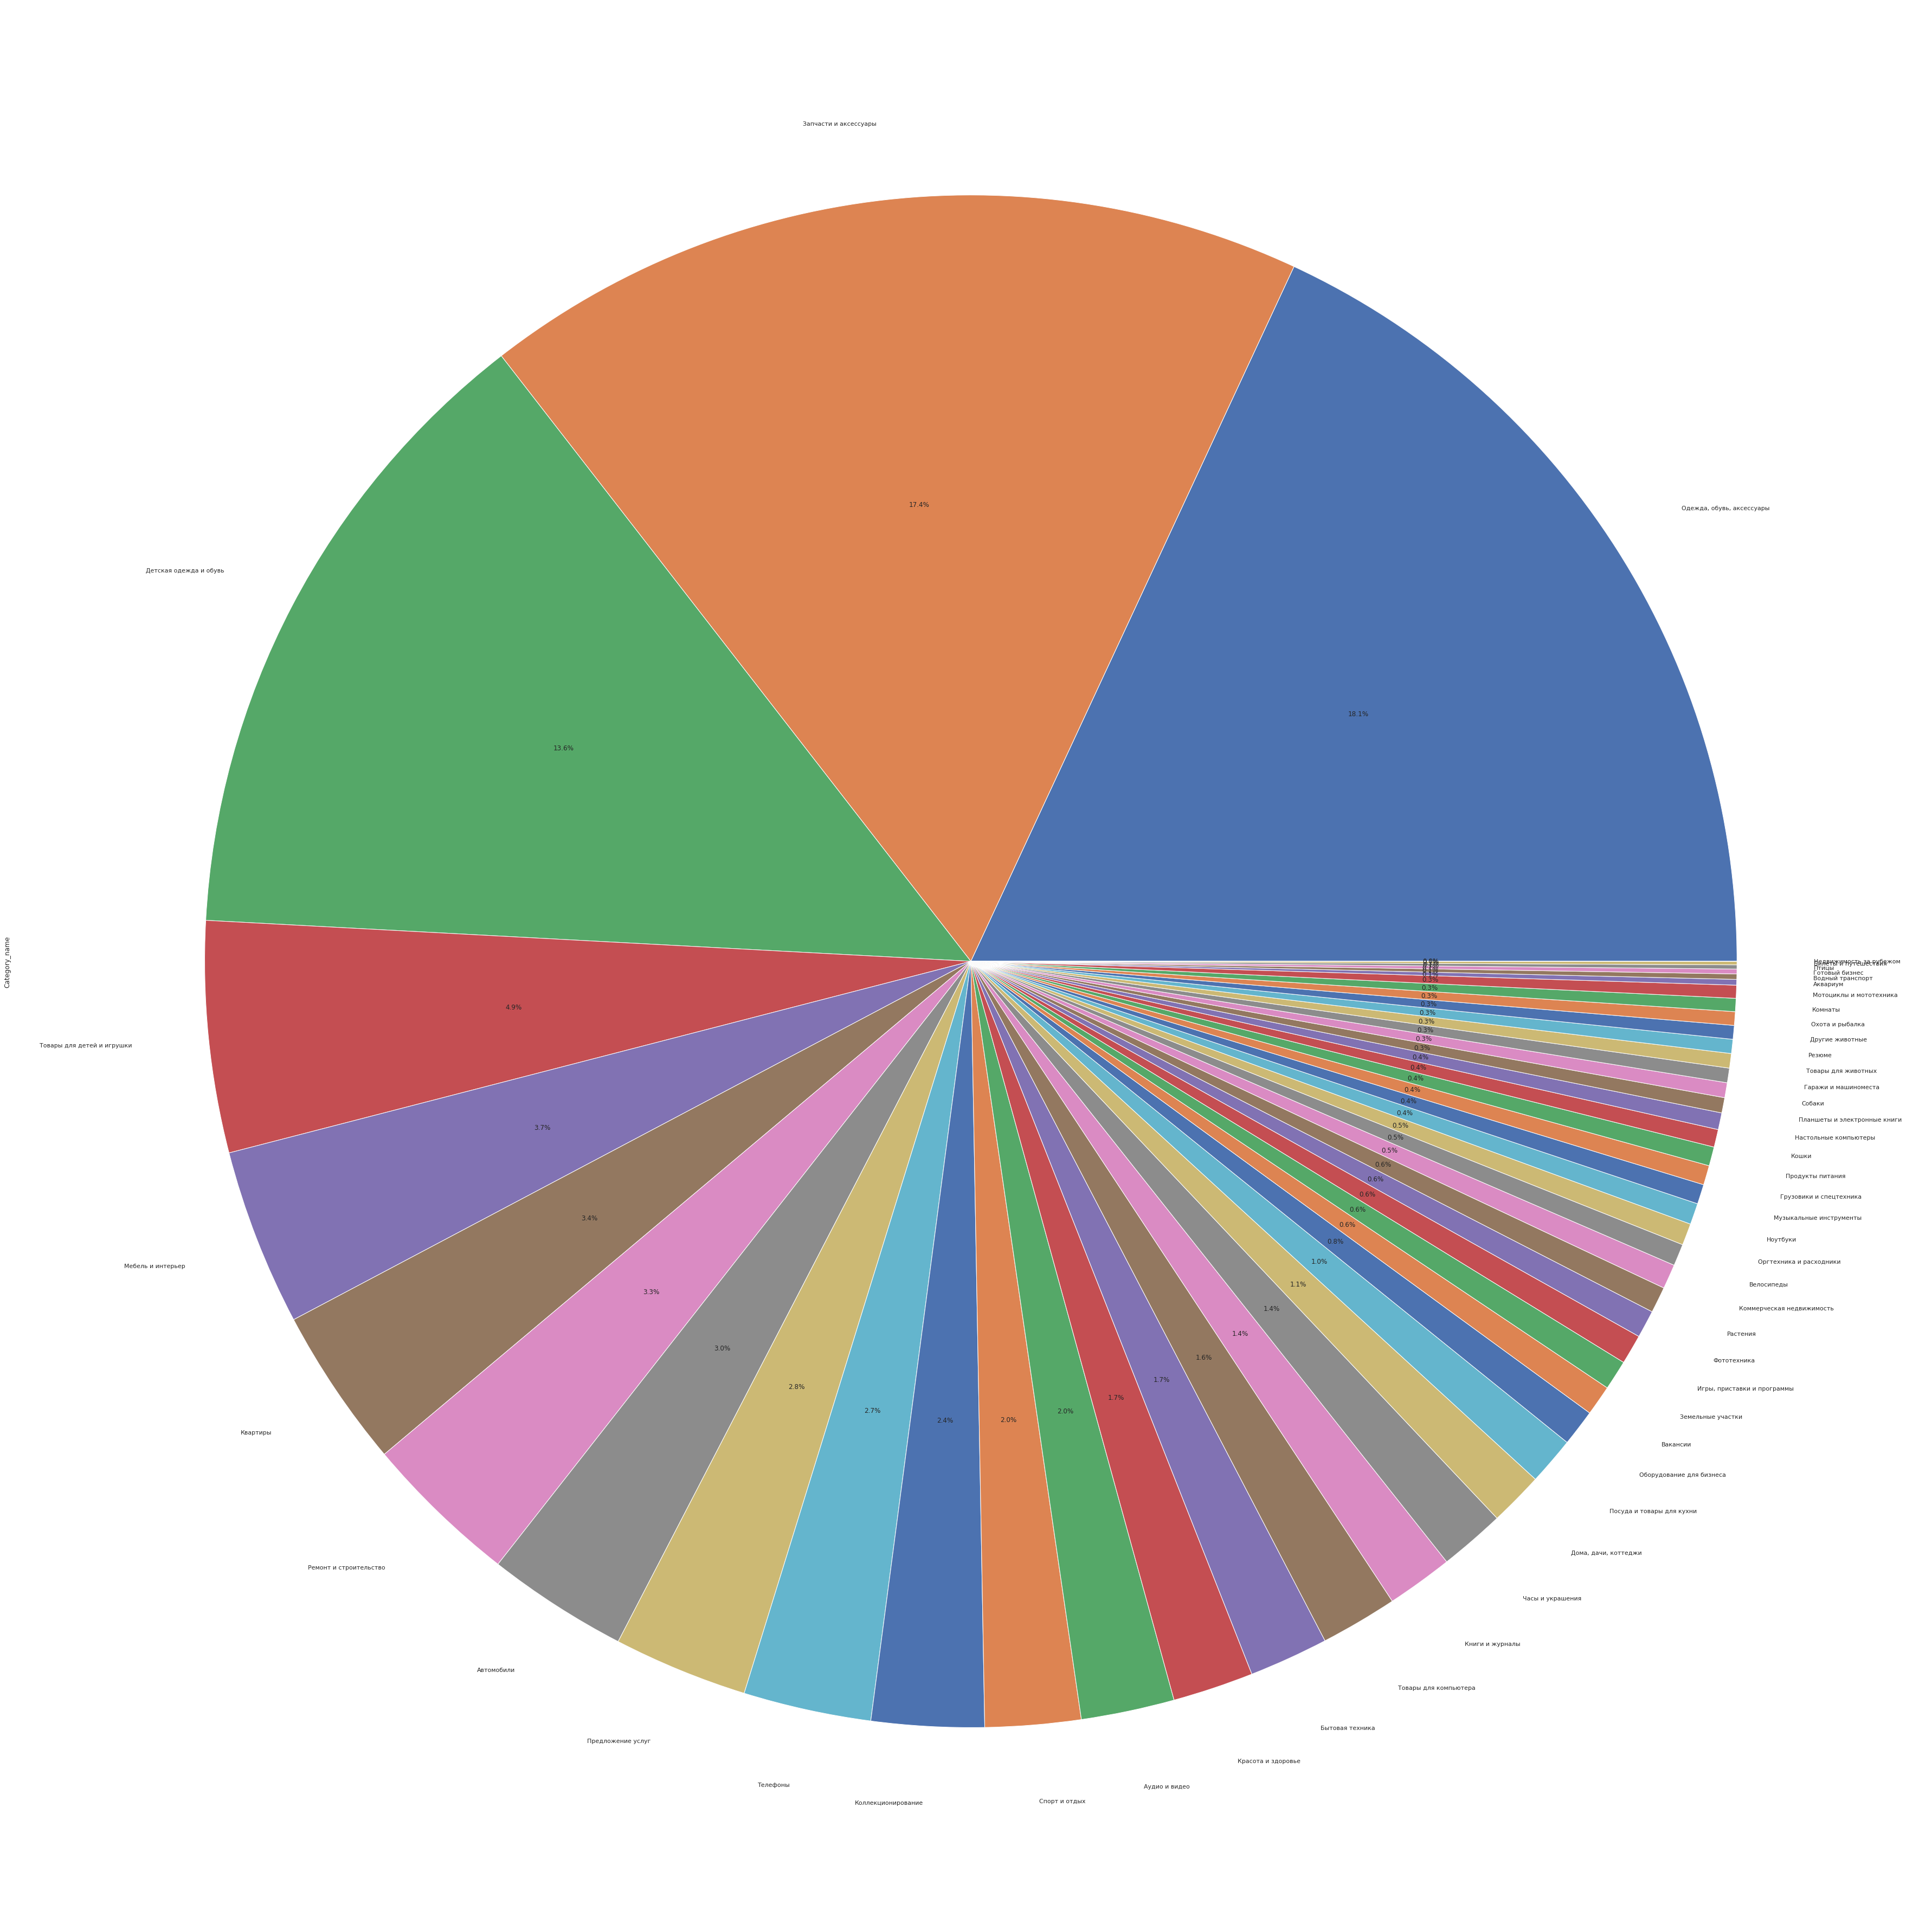

In [ ]:
# если увеличить, тут тоже наглядно видно

Train['Category_name'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False, figsize = (65,65))

plt.show()

В категории "Недвижимость за рубежом" в названии стоит "квартира" + страна, а в описании слова "квартира", "забронировано", "-комнат-", "ремонт" и другие "квартирные" подробности.
В категории "Билеты и путешествия" в названии и описании фигурируют слова "купон", "промокод", "гарантия".
В категории "Птицы" - слова "порода", "возраст", названия птиц, описание и расценки.
В категории "Готовый бизнес" - слова "площадь", "здание", единицы изм. площади, аббревиатуры, канцелярское описание недвижимости.
В категории "Водный транспорт" - названия водно-транспортных модулей (английские + цифры), соответствующая лексика: "водный", "морской", "мотор", "лодка", "катер" и тд.
В категории "Одежда, обувь, аксессуары" - слова "состояние", "цвет", названия материалов и частей одежды и тела (ремень, плечи и тд).
В категории "Запчасти и аксессуары" - слова "детали", "запчасти", марки машин и названия частей машины.
В категории "Детская одежда и обувь" - "девочка", "мальчик", названия одежды, уменьшительные суффиксы.
В категории "Товары для детей и игрушки" - "детский", "малыш", "мама", тоже есть артикул вещи.
В категории "Мебель и интерьер" - размер (+ единицы измерения длины), названия мебели и её частей.

В целом, у каждой категории есть общее, особенно типичные слова.

**Задание 2.** (1 балл). Попробуем также исследовать некоторое текстовое наполнение наших объявлений. Посчитайте топ-10 самых часто встречаемых слов в объявлениях (т.е. во всем 1млн строк) вне зависимости от их формы. Также рассмотрите топ-10 самых редких слов.

На данном этапе, до обработки текста, можно условиться, что за слово в объявлении мы будет считать набор символов, отделенный от других наборов символов двумя пробелами. Сделайте некоторые выводы по полученному топу и антитопу слов.

In [ ]:
Train.head(10)

,title,description,Category_name,Category
1482843,Айпад 4 WiFi 16 gb,"В хорошем состоянии, все работает, комплект то...",Планшеты и электронные книги,96
1703596,Платье,Платье в отличном состоянии./\nПокупала на нов...,"Одежда, обувь, аксессуары",27
1111682,Блок управления двигателем Мазда 6 GH 2010-201...,Блок управления двигателем Мазда 6 GH 2010-201...,Запчасти и аксессуары,10
2094016,"Nissan Leaf, 2013","Aze0. SOH 72%. Автомобиль аукционный, два комп...",Автомобили,9
3022433,Листовая Медь,"Листовая медь 20см*30см толщина 0,2мм за 200р/...",Ремонт и строительство,19
2286529,"1-к квартира, 43 м², 8/16 эт.",Продается просторная очень теплая однокомнатна...,Квартиры,24
1372358,Дендробиум Нобиле,"Продам дендробиумы Нобиле. Цвета на фото, есть...",Растения,106
2807521,Юбка для девочки,Юбочка очень пышная) на 116-122) в хорошем сос...,Детская одежда и обувь,29
1482888,Отдам 5 пакетов одежды,"каждое фото за 100 руб/\nчто-то побольше, что-...",Детская одежда и обувь,29
2255097,Шины Мишлен,цена за одну штуку,Ремонт и строительство,19


In [ ]:
from collections import Counter

In [ ]:
cnt = Counter()

In [ ]:
Train['title&description'] = Train['title'].str[:] + ' ' + Train['description'].str[:] # ? здесь ли

In [ ]:
# 150 самых частых "слов" в title&description

cnt = Counter(str(Train['title&description'].tolist()).split(' '))
cnt.most_common(150)

[('в', 1065753),
 ('и', 1035316),
 ('на', 805817),
 ('', 666968),
 ('с', 538544),
 ('-', 490137),
 ('по', 423422),
 ('для', 412336),
 ('не', 242812),
 ('от', 206029),
 ('до', 190843),
 ('В', 177303),
 ('за', 148420),
 ('из', 143047),
 (',', 123295),
 ('или', 118310),
 ('2', 106374),
 ('без', 102651),
 ('Продам', 94826),
 ('все', 93851),
 ('/\\n', 92674),
 ('1', 87022),
 ('отличном', 75532),
 ('к', 74348),
 ('хорошем', 70672),
 ('при', 69938),
 ('3', 69370),
 ('можно', 67588),
 ('есть', 66550),
 ('*', 63681),
 ('под', 63281),
 ('/\\n-', 62940),
 ('очень', 62285),
 ('наличии', 62100),
 ('как', 62061),
 ('–', 61635),
 ('размер', 61028),
 ('у', 58392),
 ('/', 55900),
 ('↓', 55166),
 ('5', 51282),
 ('На', 50545),
 ('4', 50299),
 ('Продаю', 49873),
 ('.', 48320),
 ('состоянии.', 46970),
 ('так', 45029),
 ('запчасти', 43567),
 ('что', 43514),
 ('Состояние', 42282),
 ('а', 42156),
 ('10', 42149),
 ('Размер', 41158),
 ('состоянии,', 40411),
 ('фото', 40384),
 ('же', 39623),
 ('только', 39186),


In [ ]:
# 300 самых редких (т.е. встречающихся 1 раз) "слов" в title&description

cnt.most_common()[:-300:-1]

[("торг.']", 1),
 ('руб.,хороший', 1),
 ('отдам,30000', 1),
 ('GB,чёрный,хорошее', 1),
 ("Муравей',", 1),
 ('заведём', 1),
 ('проффесионалы./\\nЗвоните!!!/\\nПриедим', 1),
 ('результат./\\nОпытные', 1),
 ('компьютеры./\\nРаботаем', 1),
 ('ошибок./\\nТолько', 1),
 ('авто./\\nСчитывание', 1),
 ('6500+ком.услуги.', 1),
 ('П-24/\\nСтоит', 1),
 ("звеньями',", 1),
 ('хоз.помещения', 1),
 ('сан\\\\узлы', 1),
 ('аккумулятора./\\nВес', 1),
 ('назад./\\nСветодиодный', 1),
 ('управления./\\nПять', 1),
 ('вольт./\\nТелескопическая', 1),
 ('TG:/\\nРабочее', 1),
 ('Flover', 1),
 ('(Аванс/ЗП)/\\n-Бесплатное', 1),
 ('РФ/\\n-Своевременная', 1),
 ('рост/\\n-Официальное', 1),
 ('+бонусы/\\n-Профессиональный', 1),
 ('телефону/\\n/\\n*Условия:/\\n-Фиксированный', 1),
 ('посылок/\\n-консультация', 1),
 ('ПК/\\n*Обязанности:/\\n-приём', 1),
 ('call-центр./\\n/\\nТребования:/\\n-коммуникабельность/\\n-внимательность/\\n-доброжелательность/\\n-ответственность/\\n-уверенный',
  1),
 ('(28.09,29.09)', 1),
 ('фор

In [ ]:
# 150 самых частых "слов" в title

cnt = Counter(str(Train['title'].tolist()).split(' '))
cnt.most_common(150)

[('для', 62355),
 ('на', 55783),
 ("эт.',", 36125),
 ('м²,', 33437),
 ('квартира,', 31602),
 ('и', 24606),
 ('с', 23122),
 ('в', 22732),
 ("'Продам", 16860),
 ('м²', 14446),
 ("'Куртка", 13220),
 ("'1-к", 12832),
 ("'2-к", 11411),
 ('участке', 11336),
 ("'Платье", 11235),
 ("сот.',", 11199),
 ("'Платье',", 10643),
 ('из', 10125),
 ('2', 9216),
 ("'Дом", 8106),
 ('-', 7960),
 ('3', 7752),
 ("'Комбинезон", 7735),
 ("'Сапоги", 7256),
 ("'Ботинки", 7238),
 ("'Костюм", 7049),
 ("'Туфли", 6834),
 ("'Участок", 6270),
 ("'3-к", 6178),
 ('передний', 6146),
 ("'iPhone", 6054),
 ("'Бампер", 6020),
 ('задний', 5987),
 ("'Новые", 5905),
 ('4', 5767),
 ('сот.', 5751),
 ('6', 5564),
 ("м²',", 5467),
 ('по', 5393),
 ("размер',", 5318),
 ('Mercedes', 5147),
 ('размер', 5007),
 ('5', 4939),
 ("'Дверь", 4890),
 ("'Пальто", 4847),
 ("новые',", 4767),
 ("'Кроссовки", 4745),
 ('от', 4734),
 ("'Комплект", 4634),
 ("девочки',", 4570),
 ('правая', 4545),
 ("'Шины", 4544),
 ("'Куртка',", 4492),
 ("платье',", 44

In [ ]:
# 300 самых редких (т.е. встречающихся 1 раз) "слов" в title

cnt.most_common()[:-300:-1]

[("plus']", 1),
 ("1751)',", 1),
 ('Readme', 1),
 ('откатные,', 1),
 ('автоматические,', 1),
 ("репетиторства',", 1),
 ('Межевание,', 1),
 ('Кадастр,', 1),
 ("smartbabywatch',", 1),
 ("телескопической',", 1),
 ("Кэти',", 1),
 ("Т-13',", 1),
 ("'Стуля", 1),
 ('2.1/2/3-х', 1),
 ('8450', 1),
 ('Скричеры', 1),
 ("2515',", 1),
 ("Kurono',", 1),
 ('Kurumu', 1),
 ("(белый',", 1),
 ("r/ha',", 1),
 ('cisph', 1),
 ('Алигьери,', 1),
 ('Данте', 1),
 ('Инлиранги,', 1),
 ('вечерне,', 1),
 ("сникерсы,ботинки',", 1),
 ('мембраны,', 1),
 ("KE900-90032',", 1),
 ("voxtel',", 1),
 ('RangeRover', 1),
 ("225-45',", 1),
 ('Якорь"-', 1),
 ('Топор', 1),
 ('Douglas', 1),
 ('Takeit', 1),
 ("34gb',", 1),
 ('№93', 1),
 ('Artioli', 1),
 ("аиф)',", 1),
 ('(копии', 1),
 ('Республик', 1),
 ('пружина)', 1),
 ('(амортизатор,', 1),
 ('Баркас', 1),
 ('128gb,состояние', 1),
 ('Дутики,', 1),
 ("'Р.27", 1),
 ("'Соха", 1),
 ('OpenBox', 1),
 ('4026', 1),
 ("'Octave999", 1),
 ("'Минипылесос',", 1),
 ("SP-805b',", 1),
 ("trunki'

In [ ]:
# 150 самых частых "слов" в description

cnt = Counter(str(Train['description'].tolist()).split(' '))
cnt.most_common(150)

[('в', 1039188),
 ('и', 1010586),
 ('на', 749377),
 ('', 666968),
 ('с', 515030),
 ('-', 481179),
 ('по', 417770),
 ('для', 349610),
 ('не', 241844),
 ('от', 201090),
 ('до', 188718),
 ('за', 147124),
 ('В', 140848),
 ('из', 132867),
 (',', 123265),
 ('или', 117109),
 ('без', 101369),
 ("'Продам", 92823),
 ('все', 92781),
 ('/\\n', 92674),
 ('2', 92384),
 ('1', 79628),
 ('отличном', 74659),
 ('к', 73095),
 ('хорошем', 70065),
 ('при', 69864),
 ('можно', 67438),
 ('есть', 66190),
 ('*', 63534),
 ('/\\n-', 62940),
 ('–', 61632),
 ('как', 61589),
 ('очень', 61531),
 ('наличии', 61400),
 ('под', 60170),
 ('3', 58503),
 ('у', 58080),
 ('↓', 55165),
 ('/', 51544),
 ('размер', 50153),
 ('.', 48140),
 ('состоянии.', 46925),
 ('На', 46361),
 ('так', 45000),
 ('5', 44798),
 ('что', 43476),
 ("'Продаю", 42909),
 ('4', 42248),
 ('а', 41936),
 ('запчасти', 41670),
 ('состоянии,', 40346),
 ('фото', 39915),
 ('же', 39597),
 ('только', 39015),
 ('любой', 38483),
 ('10', 37991),
 ('более', 36998),
 ('д

In [ ]:
# 300 самых редких (т.е. встречающихся 1 раз) "слов" в description

cnt.most_common()[:-300:-1]

[("торг.']", 1),
 ('руб.,хороший', 1),
 ('отдам,30000', 1),
 ('GB,чёрный,хорошее', 1),
 ("Муравей',", 1),
 ('заведём', 1),
 ('проффесионалы./\\nЗвоните!!!/\\nПриедим', 1),
 ('результат./\\nОпытные', 1),
 ('компьютеры./\\nРаботаем', 1),
 ('ошибок./\\nТолько', 1),
 ('авто./\\nСчитывание', 1),
 ('6500+ком.услуги.', 1),
 ('П-24/\\nСтоит', 1),
 ('джилекс', 1),
 ("звеньями',", 1),
 ('хоз.помещения', 1),
 ('сан\\\\узлы', 1),
 ('аккумулятора./\\nВес', 1),
 ('назад./\\nСветодиодный', 1),
 ('управления./\\nПять', 1),
 ('вольт./\\nТелескопическая', 1),
 ('TG:/\\nРабочее', 1),
 ('Flover', 1),
 ('(Аванс/ЗП)/\\n-Бесплатное', 1),
 ('РФ/\\n-Своевременная', 1),
 ('рост/\\n-Официальное', 1),
 ('+бонусы/\\n-Профессиональный', 1),
 ('телефону/\\n/\\n*Условия:/\\n-Фиксированный', 1),
 ('посылок/\\n-консультация', 1),
 ('ПК/\\n*Обязанности:/\\n-приём', 1),
 ('call-центр./\\n/\\nТребования:/\\n-коммуникабельность/\\n-внимательность/\\n-доброжелательность/\\n-ответственность/\\n-уверенный',
  1),
 ('(28.09,29

ВЫВОДЫ: Среди самых редких везде либо "мусор" ('с2012г.в\\xa0/\\n'), либо уникальные названия ('Readme', 'Kurumu'), размеры, параметры, цены..., либо просто уникальные слова/формы слов, встречающиеся только в данном объявлении ('медному', 'Исконный').
Среди самых частых везде предлоги, союзы, знаки препинания и просто знаки, а также различные формы слов "хороший", "отличный", "продавать", "очень", "наличие", "размер", "состояние", "есть", "Вы" и тд (реклама, описание товара и обращение к покупателю), единицы измерения.


In [ ]:
Train.isnull().sum()

title            0
description      1
Category_name    0
Category         0
dtype: int64

Видно, что есть объекты с пропуском в текстовом поле `description`. Заменим пропуски на пустую строку

In [4]:
Train.fillna('', inplace=True)

Для простоты конкатенируем строки из полей `title` и `description`

In [5]:
Train['title&description'] = Train['title'].str[:] + ' ' + Train['description'].str[:]

Разделим выборку ```Train``` на обучающую и тестовую

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Train[['title&description']], Train['Category'], random_state=1337, test_size=100000)

del Train   

## дальше в качестве данных для обучения используем X_train

### 2. Обработка текста

Как вы могли заметить в рамках предыдущих пунктов, наши объявления несут в себе некоторый текстовый "мусор". Различные местоимения, междометия, или вообще набор "\n" и "\t". Так что звучит довольно логично следующая мысль: давайте мы избавимся от этого мусора в тексте и проведем некоторую фильтрацию данных.

Также в купе с этим на ум приходит информация о том, что в наших объявлениях одни и те же слова могут быть записаны в различной языковой форме, использовать различные падежи. Поэтому что?
Да, лемматезация. Благо, мы живем с вами в современном мире, и люди для этой задачи написали уже несколько фреймворков, которые нам с вами смогут помочь в этой задаче, в этой дз я рекомендую использовать pymorphy2.

Следующая мысль, которая может прийти на ум в рамках обработки текстовых данных - это стоп слова. Их в наших объявлениях достаточно много (ведь их писали люди). Поэтому их также стоит отфильтровать.

Исходя из этих пунктов, след задание можно описать так:

**Задание 3.** (2 балла). Реализуйте функцию, которая принимает на вход строку, набор стоп слов и морфо-анализатор, и на выходе выдает набор слов (лемм), отчищенных от пунктуационных, разделяющих символов и стоп слов.

Некоторый её возможный шаблон представлен ниже:

Подробнее про использование pymorphy смотрите [тут](https://pymorphy2.readthedocs.io/en/0.6/user/guide.html)

In [2]:
## блок с подтягиванием библиотеки для лемматизации
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install 'DAWG-Python >= 0.7'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 8.2 MB 11.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 5.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

## словарь, он же файл, который мы выдали вам вместе с домашкой, вы также можете загрузить на диск, чтобы подгрузить его в коллаб

with open('/content/drive/MyDrive/ds_intro_hw2/stop_word_ru.txt') as f:
    stop_words = []
    for lines in f:
        lines = lines.replace('\n', '')
        stop_words.append(lines)

#print(stop_words)

In [4]:
def clear_and_morhp(text, stop_words, morph):

    stop_words = stop_words
    morph = morph
  
    stroka = str(text)
    stroka = stroka.lower()
    stroka = stroka.replace('\\n', ' ')
    stroka = stroka.replace('\n', ' ')
    stroka = stroka.replace('\t', ' ')
    stroka = stroka.replace('\\t', ' ')
    stroka = stroka.replace(u'\\xa0', u' ')

    new_str = ''

    for i in range(len(stroka)):

        if stroka[i].isalpha() or stroka[i].isspace(): 
            new_str += stroka[i]


    result = []
    new_str = new_str.split(' ')

    for k in range(len(new_str)):
        
        if new_str[k] not in stop_words and new_str[k] != '':
            res = morph.parse(new_str[k])[0].normal_form
            result.append(res)

    return result

  ## её использование к нашим данн в таком формате: X_train[['title&description']].apply(lambda x: clear_and_morhp(x, stop_words, morph))

In [ ]:
'''
  text: string - строка с нашим текстом
  stop_words - List с выданными вам стоп словами
  morph - анализатор текста\слов для получения лемм
  так же не забудьте привести все слова к единому регистру
  return List слов, преобразованных до лемм + убраны различные знаки + стоп слова
  '''

Если с реализацией данной функции возникнту проблемы - не стеняйтесь писать об этом в наш чат для получения помощи.

Также вы можете реализовать не все 3 составляющих очистки текста, а какую-то их часть, но это даст вам меньше баллов.


После реализации данной функции мы можем применить её к нашим данным и получить более "чистый" набор слов.

In [ ]:
X = X_train['title&description'].apply(lambda x: clear_and_morhp(x, stop_words, morph))

In [ ]:
X.to_csv('/content/drive/MyDrive/ds_intro_hw2/title&description.csv', index=True)

In [11]:
X_train1 = pd.read_csv('/content/drive/MyDrive/ds_intro_hw2/title&description.csv',  index_col='Unnamed: 0')

In [12]:
X_train1.head(10)

,title&description
424166,"['кофточка', 'девочка', 'р', 'кофточка', 'дево..."
2093571,"['лимон', 'лимончик', 'самовывоз', 'плод']"
165041,"['квартира', 'эт', 'арт', 'продаваться', 'комн..."
2535335,"['передний', 'панель', 'mazda', 'передний', 'п..."
571894,"['босоножка', 'bershka', 'размер', 'продать', ..."
1927675,"['эт', 'продаваться', 'отличный', 'квадратный'..."
1949612,"['стеклоподъёмник', 'дверь', 'volvo', 'scx', '..."
2418729,"['школьный', 'блузка', 'школьный', 'блузка', '..."
1988050,"['сумка', 'чёрный', 'лаковый', 'кожзам', 'orif..."
3106219,"['ваз', 'готорый', 'проект', 'зимний', 'дрифт']"


In [ ]:
# и запишем еще файл, где склеено в строку

In [13]:
def www(l):      # list to string
    l = str(l)
    l = l.replace("['", "")
    l = l.replace("']", "")
    l = l.replace("'", "")
    l = l.replace(",", "")
    return(l)

X1 = X_train1['title&description'].apply(lambda x: www(x))
X1.to_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_str.csv', index=True)

In [7]:
X_train11 = pd.read_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_str.csv',  index_col='Unnamed: 0')
X_train11.head()

,title&description
424166,кофточка девочка р кофточка девочка name it ра...
2093571,лимон лимончик самовывоз плод
165041,квартира эт арт продаваться комнатный квартира...
2535335,передний панель mazda передний панель рамка ра...
571894,босоножка bershka размер продать новый актуаль...


In [ ]:
# для задания 3.3 сразу то же самое сделаем с тестовыми данными

In [ ]:
Xt = X_test['title&description'].apply(lambda x: clear_and_morhp(x, stop_words, morph))

In [ ]:
Xt.to_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_test.csv', index=True)

In [14]:
X_test1 = pd.read_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_test.csv',  index_col='Unnamed: 0')

In [ ]:
def www(l):      # list to string
    l = str(l)
    l = l.replace("['", "")
    l = l.replace("']", "")
    l = l.replace("'", "")
    l = l.replace(",", "")
    return(l)

Xt1 = X_test1['title&description'].apply(lambda x: www(x))
Xt1.to_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_test_str.csv', index=True)

In [8]:
X_test11 = pd.read_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_test_str.csv',  index_col='Unnamed: 0')
X_test11.head()

,title&description
2504863,audi a продавать машина смотреть внимательно ф...
2616770,ботинок тёплый рр ботинок бу состоняий фото
287330,велосипед детский состояние удовлетворительный...
2292725,сапог резиновый сказка р покупать месяц носить...
673307,продажа запчасть продать кардан рулевой оригин...


### 3. Построение простых эмбеддингов и работа с моделями

Сейчас вы визуально можете сравнить по определенному набору строк (допустим вызвав `.head(15)`) как изменились наши текстовые данные после предобработки. Так что мы можем с уверенностью сказать, что некоторое визуальное преобразование появилось. Но а выиграли ли мы с точки зрения достижения результата в рамках нашей задачи. Разберемся в этой части домашки.

**Задание 3.1** (0.5 балла) В рамках этого пункта нам стоит получить некоторый `бейзлайн`, с которым мы будем сравнивать остальные наши модели. Для этого вернемся к трейну X_train, в котором все еще находился мусор, слова всех форм и стоп-слова. Воспользуемся построением Tf-Idf матрицы от этих данных и также используем SGDClassifier в качестве достаточно простой модели.

Ну и в качестве метрики мы будем использовать accuracy (для подсчета этой метрики используем имеющийся у нас уже X_test), т.к. у нас все же многоклассовая классификация. Результат этой модели мы будем сравнивать с другими по ходу этого задания.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [24]:
vectorizer = TfidfVectorizer()

X_train0 = vectorizer.fit_transform(X_train['title&description'])
print(X_train0)

X_test0 = vectorizer.transform(X_test['title&description'])
print(X_test0)

  (0, 591509)	0.2520204521888792
  (0, 684303)	0.15719711560083197
  (0, 609652)	0.24285193702273047
  (0, 433580)	0.2535475554348718
  (0, 663969)	0.12752188144150498
  (0, 467175)	0.28628555515917053
  (0, 677730)	0.25516141654372615
  (0, 811499)	0.11842006207439192
  (0, 634835)	0.22960952029012374
  (0, 740039)	0.07678064411761298
  (0, 620340)	0.10211345099905711
  (0, 695738)	0.08524225512713332
  (0, 267315)	0.24607926576038436
  (0, 298650)	0.2746727615536002
  (0, 141723)	0.35271467157539316
  (0, 457428)	0.28842324918640616
  (0, 465088)	0.13219921749556704
  (0, 533042)	0.4168667065827824
  (1, 71766)	0.2814346749236284
  (1, 645372)	0.46934993420692495
  (1, 570258)	0.20920641144704763
  (1, 440693)	0.23813754478139143
  (1, 716888)	0.20920641144704763
  (1, 547395)	0.6072503255367276
  (1, 547341)	0.4330220199141299
  :	:
  (899997, 318161)	0.19486917816159255
  (899997, 614505)	0.30905430113217097
  (899997, 596137)	0.20545400083620688
  (899997, 393663)	0.08591195022350

In [ ]:
X_train0.shape

(900000, 831654)

In [ ]:
X_test0.shape

(100000, 831654)

In [ ]:
# дефолтные параметры

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train0, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test0)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.78895


**Задание 3.2** (0.5 балла) У метода TfidfVectorizer есть набор своих параметров. В рамках этого задания мы предлагаем вам поизучать возможные гиперпараметры этого метода и подобрать такие значения, которые вам позволят получить более лучший результат на непредобработанном X_train на той же простой модели SGDClassifier. Как вариант вы можете рассмореть н-граммы большей длины или поставить ограничение сверху на кол-во получаемых токенов в данном методе. 3-4 экспериментов с различными значениями гиперпараметорв будет достаточно, чтобы можно было сделать возможные выводы о значениях, которые подходят в рамках нашей задачи.

In [ ]:
# меняем количество н_грамм (1, 2) - униграммы и биграммы

In [ ]:
# тк для n_грамм >1 памяти не хватает, урезаем трейновую выборку
# чтобы сравнить качество запускаем модель с изначальными параметрами на урезанной выборке тоже

X_train_min = X_train.head(450000)
y_train_min = y_train.head(450000)

In [ ]:
# здесь урезанная выборка на дефолтных параметрах

vectorizer = TfidfVectorizer()

X_train01 = vectorizer.fit_transform(X_train_min['title&description'])
X_test01 = vectorizer.transform(X_test['title&description'])

  (0, 381272)	0.2520828987935054
  (0, 447658)	0.1569374156427332
  (0, 394064)	0.2445681319740306
  (0, 269758)	0.2558679909950305
  (0, 432753)	0.12729958937711072
  (0, 293332)	0.2853249269530469
  (0, 442840)	0.2578650197626289
  (0, 538195)	0.11824769079997563
  (0, 411714)	0.22954974901508587
  (0, 487300)	0.07654193641895435
  (0, 401748)	0.10184240333566491
  (0, 455748)	0.08495321208896932
  (0, 160237)	0.2465793359106849
  (0, 179806)	0.27241397891515257
  (0, 83002)	0.35331216735930016
  (0, 286500)	0.28808105589929356
  (0, 291805)	0.13206134119458074
  (0, 340067)	0.41477544748839024
  (1, 41794)	0.2873670657254617
  (1, 419325)	0.4767144021782634
  (1, 366326)	0.21457540155602575
  (1, 274751)	0.24471300893306652
  (1, 470719)	0.21559560794849514
  (1, 350308)	0.5918059110139238
  (1, 350263)	0.43303670297152974
  :	:
  (449998, 278878)	0.3028828445164799
  (449998, 355284)	0.16502127167316438
  (449998, 289375)	0.40912933028140064
  (449998, 427445)	0.20215890220387983
 

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train01, y_train_min)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test01)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.76294


In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

X_train01 = vectorizer.fit_transform(X_train_min['title&description'])
X_test01 = vectorizer.transform(X_test['title&description'])

  (0, 4613644)	0.17850885410589554
  (0, 3853056)	0.20768555999096242
  (0, 1885931)	0.20768555999096242
  (0, 4391928)	0.18259845559989057
  (0, 2238465)	0.20768555999096242
  (0, 4520454)	0.20768555999096242
  (0, 5978915)	0.19688113221978767
  (0, 4082350)	0.19688113221978767
  (0, 5224365)	0.1881581242787139
  (0, 3983337)	0.05703872984502454
  (0, 513737)	0.18259845559989057
  (0, 4724723)	0.12790886027921375
  (0, 932209)	0.19056094713190022
  (0, 1038512)	0.16138424124683337
  (0, 2103342)	0.20136537490307493
  (0, 513632)	0.19688113221978767
  (0, 2103195)	0.17975651936072548
  (0, 2201041)	0.1625755008050751
  (0, 2996036)	0.30589873050066474
  (0, 3651028)	0.13862022810612754
  (0, 4612750)	0.08629978653412052
  (0, 3852996)	0.1344878625404123
  (0, 1885887)	0.14070164793622847
  (0, 4391634)	0.0700019644399856
  (0, 2238451)	0.1568999985635461
  :	:
  (449999, 2218841)	0.1941115196316165
  (449999, 5632689)	0.2037215181182121
  (449999, 3505442)	0.2496436829349796
  (449999,

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train01, y_train_min)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test01)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.70701


Вывод: Как видно, самые оптимальные n_граммы (1, 1). С увеличением их кол-ва точность падает (accuracy = 0.76294 при (1, 1) VS accuracy = 0.70701 при (1, 2)).

In [ ]:
# меняем способ суммы векторов (norm)

In [ ]:
vectorizer = TfidfVectorizer(norm = 'l1')

X_train01 = vectorizer.fit_transform(X_train['title&description'])
X_test01 = vectorizer.transform(X_test['title&description'])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train01, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test01)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.75367


ВЫВОД: оптимальная сумма векторов дефолтная - l2. Иначе точность снижается (accuracy = 0.78895 при l2 VS accuracy = 0.75367 при l1).

In [ ]:
# увеличиваем max_df 

vectorizer = TfidfVectorizer(max_df = 5)

X_train01 = vectorizer.fit_transform(X_train['title&description'])
X_test01 = vectorizer.transform(X_test['title&description'])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train01, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test01)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.29675


ВЫВОД: лучше дефолтный max_df = 1, при увеличении точность падает (accuracy = 0.29675 при max_df = 5 VS accuracy = 0.78895 при max_df = 5).

In [10]:
# увеличиваем min_df

vectorizer = TfidfVectorizer(min_df = 10)

X_train01 = vectorizer.fit_transform(X_train['title&description'])
X_test01 = vectorizer.transform(X_test['title&description'])

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train01, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test01)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.83539


ВЫВОД: этот параметр при увеличении дает рост точности (accuracy = 0.78895 при дефолтном min_df = 1 VS accuracy = 0.82547 при min_df = 5 VS
 accuracy = 0.83539 при min_df = 10). Оптимальное значение min_df = 100 (подбор ниже в следующем задании).

In [ ]:
# изменим sublinear_tf на True

vectorizer = TfidfVectorizer(sublinear_tf = True)

X_train01 = vectorizer.fit_transform(X_train['title&description'])
X_test01 = vectorizer.transform(X_test['title&description'])

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train01, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test01)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.78864


ВЫВОД: этот параметр особо не влияет, но точность немного выше при дефолтном sublinear_tf = False (accuracy = 0.78895 при False VS accuracy = 0.78864 при True)

In [ ]:
# дополнительно для следующего задания посмотрим параметры, улучшающие точность SGDClassifier

In [25]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

pipe.fit(X_train01, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

y_pred = pipe.predict(X_test01)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.78915


In [ ]:
# дефолтная точность accuracy = 0.78895 => эти параметры улучшают

**Задание 3.3** (3 балла) Теперь подключим рассмотрению такой подход к агрегации фичей как Bag of words. В каком-то смысле, математически он слабее tf-idf подхода, но для этого мы и столкнем их в рамках нашего задания, чтобы посмотреть на результат.

В рамках этой части домашки предобработайте **уже очищенные** данные через tf-idf и bag of words подходы. И на полученных наборах фичей обучите **SGDClassifier**, какой-нибудь градиентный бустинг (к примеру XGBoost) и удобное для вас дерево решений (из того же sklearn). 

**Минимально** у вас должно получиться **6 экспериментов**, между которыми вы сравниваете полученные accuracy. Также для устойчивого обучения стоит поиграться с параметрами двух выбранных моделей и подходов агрегации, или же провести дополнительные эксперименты, чтобы сделать выводы, как изменение параметров моделей обучения от дефолтных влияет на наши итоговые результаты.

После проведенных экспериментов стоит изложить некоторые выводы о полученных результатах. Как повлияли разные подходы tf-id и bag of words на обучение одной и той же модели, как сопоставимы результаты с этими подходами на разных моделях.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# на обработанных данных:

In [69]:
# точность на SGDClassifier с дефолтными параметрами для tf-idf

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train11['title&description'])
X_test_vec = vectorizer.transform(X_test11['title&description'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train_vec, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test_vec)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.77853


In [11]:
# tf-idf и дерево решений DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth = 100))])

pipe.fit(X_train_vec, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth = 100))])

y_pred = pipe.predict(X_test_vec)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.65544


In [14]:
# tf-idf и бустинг XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('XGBClassifier', XGBClassifier(n_estimators = 5))])

pipe.fit(X_train_vec, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('XGBClassifier', XGBClassifier(n_estimators = 5))])

y_pred = pipe.predict(X_test_vec)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.63498


In [44]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train11['title&description'])
X_test_counts = count_vect.transform(X_test11['title&description'])

In [ ]:
# точность на SGDClassifier с дефолтными параметрами для bag of words

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

pipe.fit(X_train_counts, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier())])

y_pred = pipe.predict(X_test_counts)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.79281


In [16]:
# bag of words и дерево решений DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth = 100))])

pipe.fit(X_train_counts, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('DecisionTreeClassifier', DecisionTreeClassifier(max_depth = 100))])

y_pred = pipe.predict(X_test_counts)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.66193


In [43]:
# bag of words и бустинг XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('XGBClassifier', XGBClassifier(n_estimators = 5))])

pipe.fit(X_train_counts, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('XGBClassifier', XGBClassifier(n_estimators = 5))])

y_pred = pipe.predict(X_test_counts)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.6278


In [ ]:
# теперь подберем в лучшую модель (SGDClassifier) лучшие параметры и подходы агрегации

In [26]:
vectorizer = TfidfVectorizer(min_df = 10)
X_train_vec = vectorizer.fit_transform(X_train11['title&description'])
X_test_vec = vectorizer.transform(X_test11['title&description'])

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

pipe.fit(X_train_vec, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

y_pred = pipe.predict(X_test_vec)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.8325


In [ ]:
#

In [73]:
vectorizer = TfidfVectorizer(min_df = 100)
X_train_vec = vectorizer.fit_transform(X_train11['title&description'])
X_test_vec = vectorizer.transform(X_test11['title&description'])

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

pipe.fit(X_train_vec, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

y_pred = pipe.predict(X_test_vec)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

KeyboardInterrupt: ignored

In [ ]:
# подбор min_df точность при tf-idf (заметки)

min_df = 20 -> acc = 0.8401 or 0.841
min_df = 30 -> acc = 0.84368
min_df = 50 -> acc = 0.8454
100 -> 0.84753
110 -> 0.84601
150 -> 0.84392
200 -> 0.84113
300 -> 0.83308

In [ ]:
# проверка: те же параметры для bag of words подхода

In [32]:
count_vect = CountVectorizer(min_df = 100)
X_train_counts = count_vect.fit_transform(X_train11['title&description'])
X_test_counts = count_vect.transform(X_test11['title&description'])

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

pipe.fit(X_train_counts, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

y_pred = pipe.predict(X_test_counts)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.8299


ВЫВОДЫ: на обработанных данных почему-то ниже точность при tf-idf, чем на необработанных (в SGDClassifier). В SGDClassifier бОльшую точность дает bag of words при дефолтных параметрах, однако при увеличении min_df бОльшую точность дает tf-idf. Бустинг пришлось ограничить n_estimators = 5, а дерево решений максимальной глубиной 100 из-за очень долгого времени работы, однако это привело к снижению точности, поэтому лучшей моделью в этой задаче с учетом времени стал SGDClassifier при tf-idf подходе (максимальная точность 0.84753 при min_df = 100 и SGDClassifier(max_iter = 2000, eta0=1e-05)). Для бустинга tf-idf дал большую точность, а для дерева решений - bag of words (при одинаковых ограничениях).

### 4. В погоне за кагглом (снова)

**Задание 4.** (1 балл) Да, вам снова нужно попробовать собрать сабмит для нашей тестирующей системе на каггле, для этого:
Вы выбираете одну из рассмотренных пар: подхода к агрегации фичей и саму модель (или же берете вообще какой-нибудь LinearSVC, мы не запрещаем).
Делаете такую же предобработку данных к тесту (очистка, агрегация фичей), и по выбранной вами модели строите предикт для тестовых данных. Сохранить его также стоит сразу по пути на диск: `/content/drive/MyDrive/ds_intro_hw2/submit.csv`, чтобы его было оттуда файликом проще забрать.

In [5]:
import pandas as pd

Test = pd.read_csv('/content/drive/MyDrive/ds_intro_hw2/test.csv', index_col='Id')

In [6]:
Test.head()

,title,description
Id,,
2784587,Оборудование для магазина детской одежды,Продается торговое оборудование для магазина д...
317028,SAMSUNG Galaxy A3 2017,Samsung Galaxy A3 2017 16 Gb Black Sky Хороший...
1577177,Ботинки Reima tec 31 размер,"Продам зимние ботинки Reima tec 31 размера, оч..."
1129188,Крыло заднее nissan primera HP12 P12E QP12 RP1...,ПОЛНОЕ НАИМЕНОВАНИЕ ТОВАРА И СОВМЕСТИМОСТЬ:/\n...
764202,Одежда,"Продам платье, ткань приятна к телу,декольте о..."


In [5]:
Test.shape

(1100000, 3)

In [6]:
Test.isnull().sum()

Id             0
title          0
description    1
dtype: int64

In [7]:
Test.fillna('', inplace=True)

In [8]:
Test['title&description'] = Test['title'].str[:] + ' ' + Test['description'].str[:]

In [10]:
XT = Test['title&description'].apply(lambda x: clear_and_morhp(x, stop_words, morph))

In [12]:
XT.to_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_TEST.csv', index=True)

In [13]:
Test1 = pd.read_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_TEST.csv', index_col='Id')

In [15]:
def www(l):      # list to string
    l = str(l)
    l = l.replace("['", "")
    l = l.replace("']", "")
    l = l.replace("'", "")
    l = l.replace(",", "")
    return(l)

XT1 = Test1['title&description'].apply(lambda x: www(x))
XT1.to_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_TEST_str.csv', index=True)

In [36]:
Test11 = pd.read_csv('/content/drive/MyDrive/ds_intro_hw2/title&description_TEST_str.csv', index_col='Id')
Test11.head()

,title&description
Id,
2784587,оборудование магазин детский одежда продаватьс...
317028,samsung galaxy a samsung galaxy a gb black sky...
1577177,ботинок reima tec размер продать зимний ботино...
1129188,крыло задний nissan primera hp pe qp rp tn пол...
764202,одежда продать платье ткань приятный телудекол...


In [17]:
del Test

In [37]:
vectorizer = TfidfVectorizer(min_df = 100)
X_train_vec = vectorizer.fit_transform(X_train11['title&description'])
X_test_vec = vectorizer.transform(Test11['title&description'])

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

pipe.fit(X_train_vec, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), ('SGDClassifier', SGDClassifier(max_iter = 2000, eta0=1e-05))])

y_pred = pipe.predict(X_test_vec)

In [39]:
Test11['Category'] = y_pred

In [41]:
sub = Test11.drop(Test11.columns[[0]], axis = 1)

In [43]:
sub.to_csv('/content/drive/MyDrive/ds_intro_hw2/submit.csv', index=True)

In [ ]:
### В этом эксперименте модель предсказывает категорию по объединенным колонкам title&description в данных объявлений с авито. Текст сначала проходит обработку через специальную функцию (удаление "мусора", стоп-слов, лемматизация), затем через TfidfVectorizer (с лучшими параметрами). Потом модель SGDClassifier (которая оказалась лучшей в этом эксперименте с учетом ограничений по времени работы) делает предсказание.

### 5. Рисерч

**Задание 5.** (1 балл) В рамках этого пункта мы предлагаем вам еще поработать над данной задачей в другом подходе. В рамках задания 3 мы обучили некоторый ансамбл моделей. А что, если они будут работать над нашей задачей вместе? Да, фактически в этой задаче может помочь некотрое ансамблирование моделей.

Для его более честной и усточивой работы, к имеющимся обучающим данным вы можете применить бустреп к каждой из n-моделей (сколько вы выберете - дело ваше, но желательно не меньше 3), чтобы ей на вход поступили разные подмножества данных.

Или же вы можете поискать другие полезные закономерности в имеющихся данных, которые помогут улучшить нашу метрику качества по этой задаче. В этом плане мы вас не ограничиваем.

Но если все же в голову ничего не приходит, предлагаем рассмотреть ансамблирование нескольких моделей.

В рамках ограничения оперативной памяти, вы можете их обучить по отдельности, после сохранить черзе `pickle` и после подгрузить их для некторого ансамблирования. Итоговый класс вы можете выбирать через выбор большинства, или же предложить свою эвристику.

In [61]:
# применим ансамбль моделей с помощью VotingClassifier (решение принимается голосованием)
# модели в ансамбле SGDClassifier, DecisionTreeClassifier, XGBClassifier

from sklearn.ensemble import VotingClassifier

In [60]:
vectorizer = TfidfVectorizer(min_df = 100)
X_train_vec = vectorizer.fit_transform(X_train11['title&description'])
X_test_vec = vectorizer.transform(X_test11['title&description'])

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

SGD_clf = SGDClassifier(max_iter = 2000, eta0=1e-05)
DTree_clf = DecisionTreeClassifier(max_depth = 100)
XGB_clf = XGBClassifier(n_estimators = 4)

pipe = Pipeline([('scaler', StandardScaler(with_mean=False)), 
                 ('VotingClassifier', VotingClassifier(estimators=[('SGD', SGD_clf), ('DTree', DTree_clf), ('XGB', XGB_clf)], voting='hard'))])

pipe.fit(X_train_vec, y_train)
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)), 
                ('VotingClassifier', VotingClassifier(estimators=[('SGD', SGD_clf), ('DTree', DTree_clf), ('XGB', XGB_clf)], voting='hard'))])

y_pred = pipe.predict(X_test_vec)

# качество модели

accuracy = accuracy_score(y_pred, y_test)
print("accuracy =", accuracy)

accuracy = 0.74787


ВЫВОДЫ: точность получилась ниже максимальной (но заметно выше максимальной в дереве решений и бустинге раньше), возможно потому, что дерево решений и бустинг имели среднюю точность из-за ограничений глубины дерева и n_estimators из-за ограничений по времени. В целом, можно сказать, что ансамбль моделей повышает точность (видно для бустинга и дерева решений).